<a href="https://colab.research.google.com/github/dradhikari/Loan_Prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2019]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing some important librarys.

In [2020]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset Overview:

In [2021]:
df = pd.read_csv(r'train_data.csv')

In [2022]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2023]:
df.shape

(614, 13)

In [2024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2025]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [2026]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
282,LP001915,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y
320,LP002051,Male,Yes,0,Graduate,No,2400,2167.000000,115.0,360.0,1.0,Semiurban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.000000,100.0,240.0,NaN,Urban,Y
176,LP001608,Male,Yes,2,Graduate,No,2045,1619.000000,101.0,360.0,1.0,Rural,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.000000,200.0,360.0,1.0,Urban,Y


Feature Engineering:

In [2027]:
##Total Applicant Income:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='Total_Income_log', ylabel='Count'>

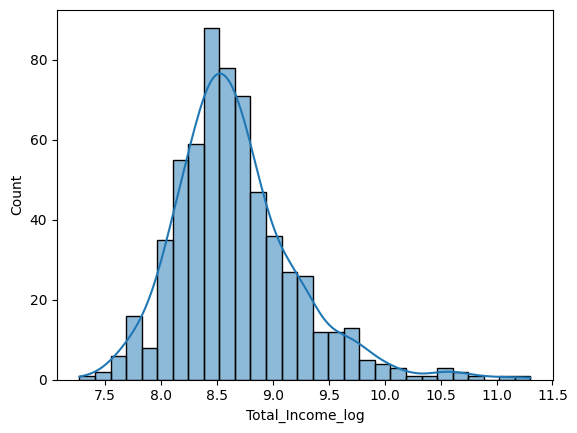

In [2028]:
# Apply Log Transformation for scalling the data:
df["Total_Income_log"] = np.log(df["Total_Income"])
sns.histplot(df["Total_Income_log"], kde = True)

In [2029]:
df["Loan_Amount_log"] = np.log(df["LoanAmount"])
df["Loan_Amount_Term_log"] = np.log(df["Loan_Amount_Term"])
df["Total_Income_log"] = np.log(df["Total_Income"])

In [2030]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_log', 'Loan_Amount_log',
       'Loan_Amount_Term_log'],
      dtype='object')

In [2031]:
df['Loan_Amount_Term_log'].unique()

array([5.88610403, 4.78749174, 5.48063892,        nan, 5.19295685,
       4.09434456, 5.70378247, 6.1737861 , 3.58351894, 4.4308168 ,
       2.48490665])

In [2032]:
#Drop Unnecessary Column:
df = df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,Loan_Amount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,NaN,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104


In [2033]:
df.duplicated().any()

False

Missing Data:

In [2034]:
df.isnull().sum()*100/len(df)

,0
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
Credit_History,8.143322
Property_Area,0.000000
Loan_Status,0.000000
Total_Income_log,0.000000
Loan_Amount_log,3.583062


In [2035]:
## Handling Missing Data:
# Drop rows with missing values less than 5% in the current column.
col = ["Gender","Married", "Dependents","Loan_Amount_log","Loan_Amount_Term_log"]
for i in col:
    df = df.dropna(subset = [i])

In [2036]:
# Fill missing values with the mode of respective column.
col2 = ["Self_Employed", "Credit_History"]
for j in col2:
    df[j] = df[j].fillna(df[j].mode()[0])

In [2037]:
df.isnull().sum().any()

False

In [2038]:
df.shape

(553, 11)

Data Visualization:

The percentage of loan approved: 70.34%
The percentage of loan not approved: 29.66%


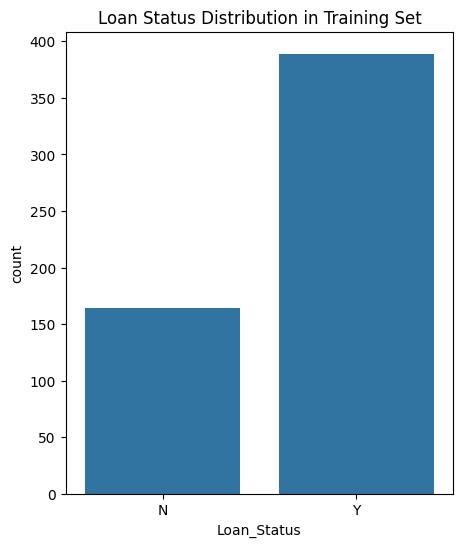

In [2039]:
plt.figure(figsize=(5, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution in Training Set')

loan_approved_percentage = (df['Loan_Status'].value_counts()[0] / len(df)) * 100
loan_not_approved_percentage = (df['Loan_Status'].value_counts() [1]/ len(df)) * 100

print('The percentage of loan approved: %.2f%%' % loan_approved_percentage)
print('The percentage of loan not approved: %.2f%%' % loan_not_approved_percentage)

<Axes: xlabel='Married', ylabel='count'>

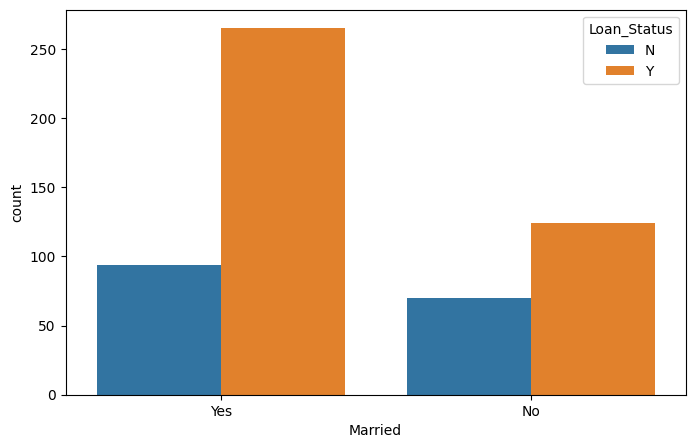

In [2040]:
# Marital_status Vs Loan_status:
plt.figure(figsize=(8,5))
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

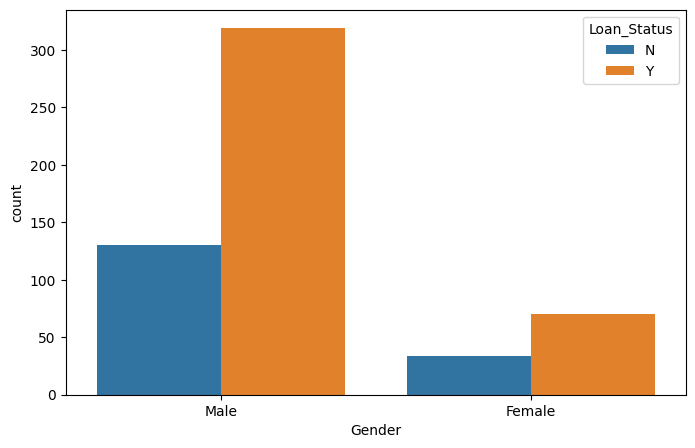

In [2041]:
# Gender Vs Loan_status:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Dependents', ylabel='count'>

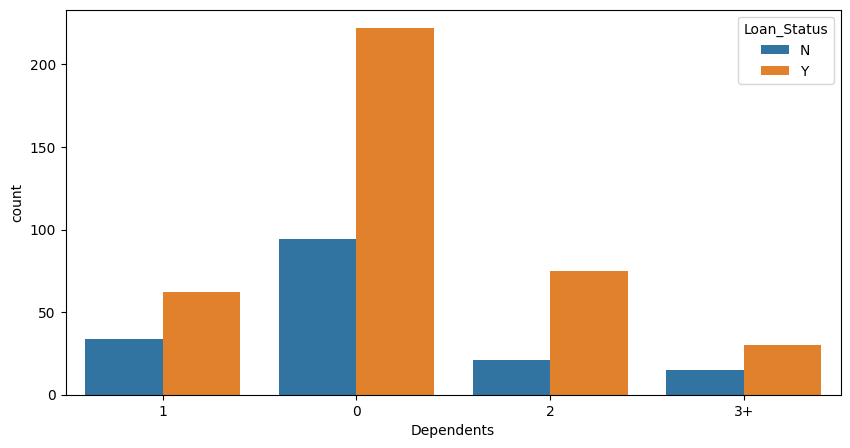

In [2042]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

<Axes: xlabel='Education', ylabel='count'>

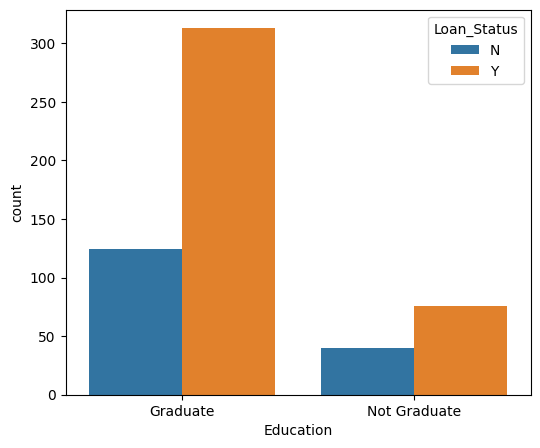

In [2043]:
# Education Vs Loan_Status:
plt.figure(figsize=(6,5))
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

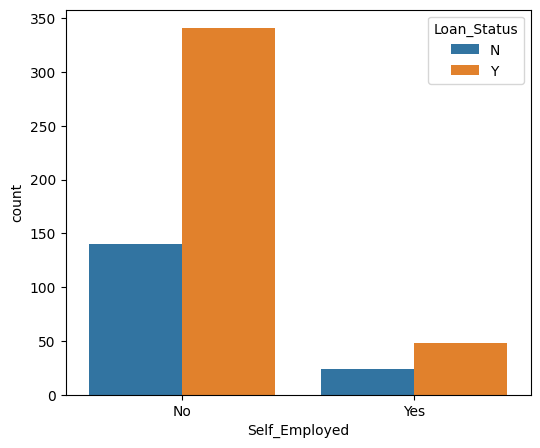

In [2044]:
plt.figure(figsize=(6,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

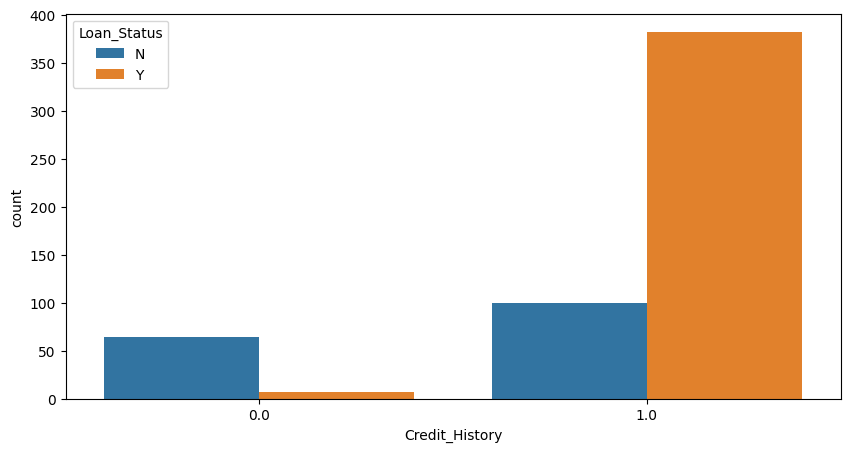

In [2045]:
plt.figure(figsize=(10,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

From the above plots, we can conclude that married males with no dependents and a graduate degree are more likely to be approved for loans, and credit score is the main factor in loan approval process.

In [2046]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,Loan_Amount_log,Loan_Amount_Term_log
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104


In [2047]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'Total_Income_log',
       'Loan_Amount_log', 'Loan_Amount_Term_log'],
      dtype='object')

In [2048]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = df.iloc[:, [0, 1, 3,4 ,6,7]]
for i in columns_to_encode:
   df[i] = le.fit_transform(df[i])

In [2049]:
df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [2050]:
# Replace '3+' with '4'
df['Dependents'] = df['Dependents'].replace('3+', '4')

In [2051]:
df['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

Multicollinearity Check:

In [2052]:
# Compute correlation matrix for checking multicolinearlity:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,Loan_Amount_log,Loan_Amount_Term_log
Gender,1.00,0.35,0.18,0.05,-0.01,0.01,-0.00,0.03,0.16,0.14,-0.07
Married,0.35,1.00,0.33,0.01,-0.01,0.02,0.03,0.10,0.13,0.18,-0.07
Dependents,0.18,0.33,1.00,0.05,0.04,-0.04,-0.00,0.01,0.11,0.14,-0.07
Education,0.05,0.01,0.05,1.00,-0.00,-0.04,-0.08,-0.05,-0.19,-0.15,-0.06
Self_Employed,-0.01,-0.01,0.04,-0.00,1.00,-0.03,-0.03,-0.03,0.19,0.11,-0.03
Credit_History,0.01,0.02,-0.04,-0.04,-0.03,1.00,-0.00,0.51,-0.01,-0.03,0.01
Property_Area,-0.00,0.03,-0.00,-0.08,-0.03,-0.00,1.00,0.05,-0.02,-0.09,-0.08
Loan_Status,0.03,0.10,0.01,-0.05,-0.03,0.51,0.05,1.00,-0.02,-0.05,-0.00
Total_Income_log,0.16,0.13,0.11,-0.19,0.19,-0.01,-0.02,-0.02,1.00,0.67,-0.03
Loan_Amount_log,0.14,0.18,0.14,-0.15,0.11,-0.03,-0.09,-0.05,0.67,1.00,0.09



Since the correlation coefficients between variables are less than 0.7,
there is no significant issue of multicollinearity in the dataset.
This indicates that the predictor variables are not highly correlated, and the model is unlikely to suffer from instability due to multicollinearity.


Outlier Detection and Removal:

<Axes: >

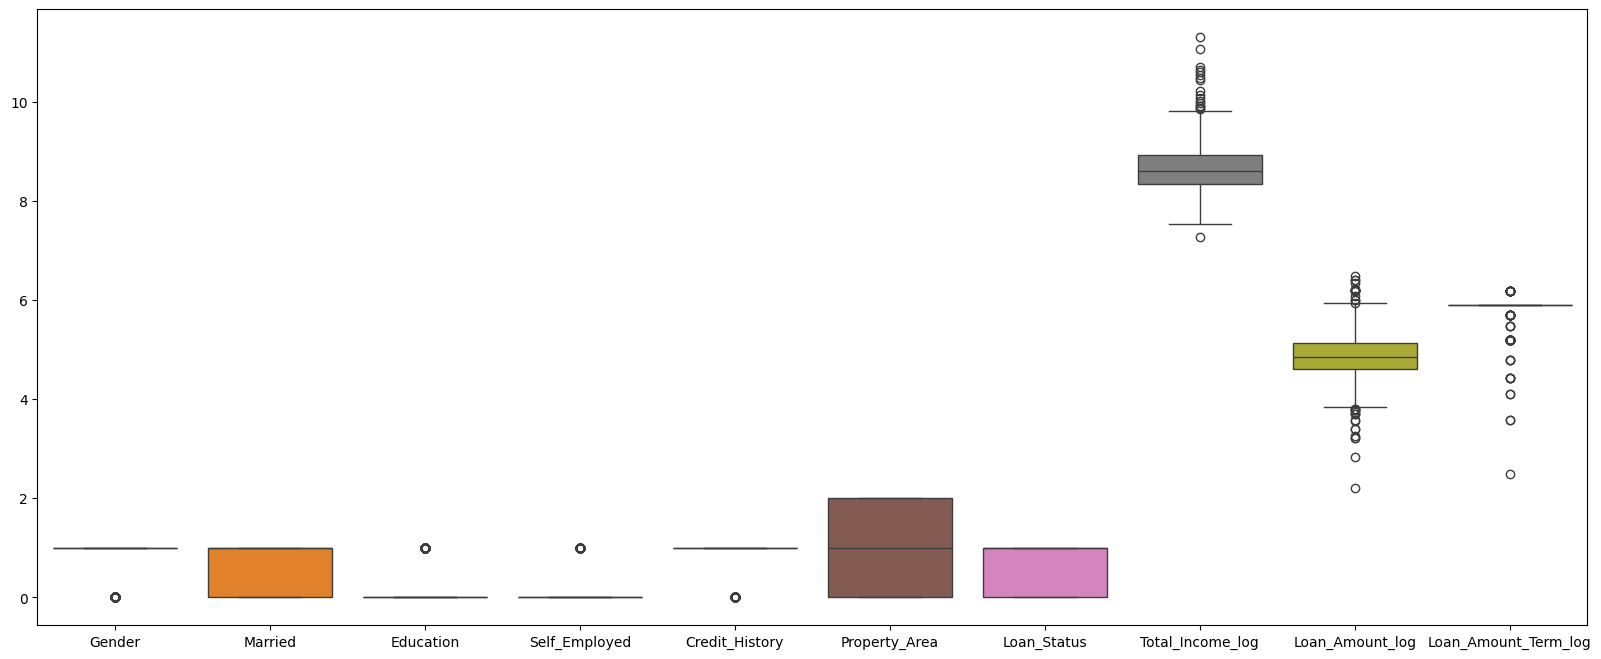

In [2053]:
##Checking the Outliers:
plt.figure(figsize=(20,8))
sns.boxplot(data = df)

In [2054]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant column
X = df[['Loan_Amount_log', 'Total_Income_log']]
X = add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature         VIF
0             const  258.942709
1   Loan_Amount_log    1.802328
2  Total_Income_log    1.802328


Here, the Variance Inflation Factor (VIF) values for both features Loan_Amount_log and Total_Income_log are both 1.802328, which is well below the commonly used threshold of 5  for multicollinearity concerns. This level of correlation is unlikely to negatively impact our model or analysis. So, we can keep both features.




<Axes: >

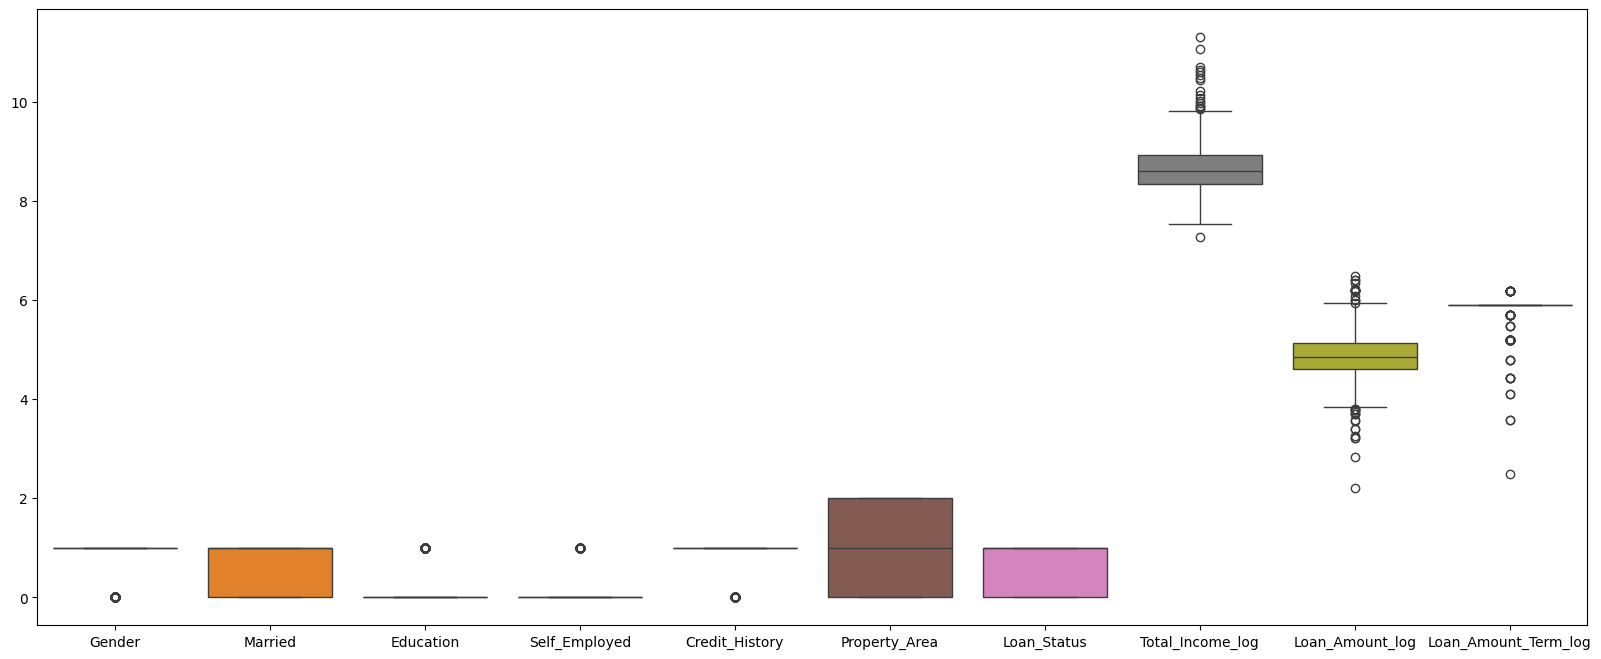

In [2055]:
##Checking the Outliers:
plt.figure(figsize=(20,8))
sns.boxplot(data = df)

In [2056]:
# Remove outliers from specified columns using Inter Quartile Range Concept:
columns = [ 'Loan_Amount_log', 'Total_Income_log']

def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outliers_iqr(df, columns)

<Axes: >

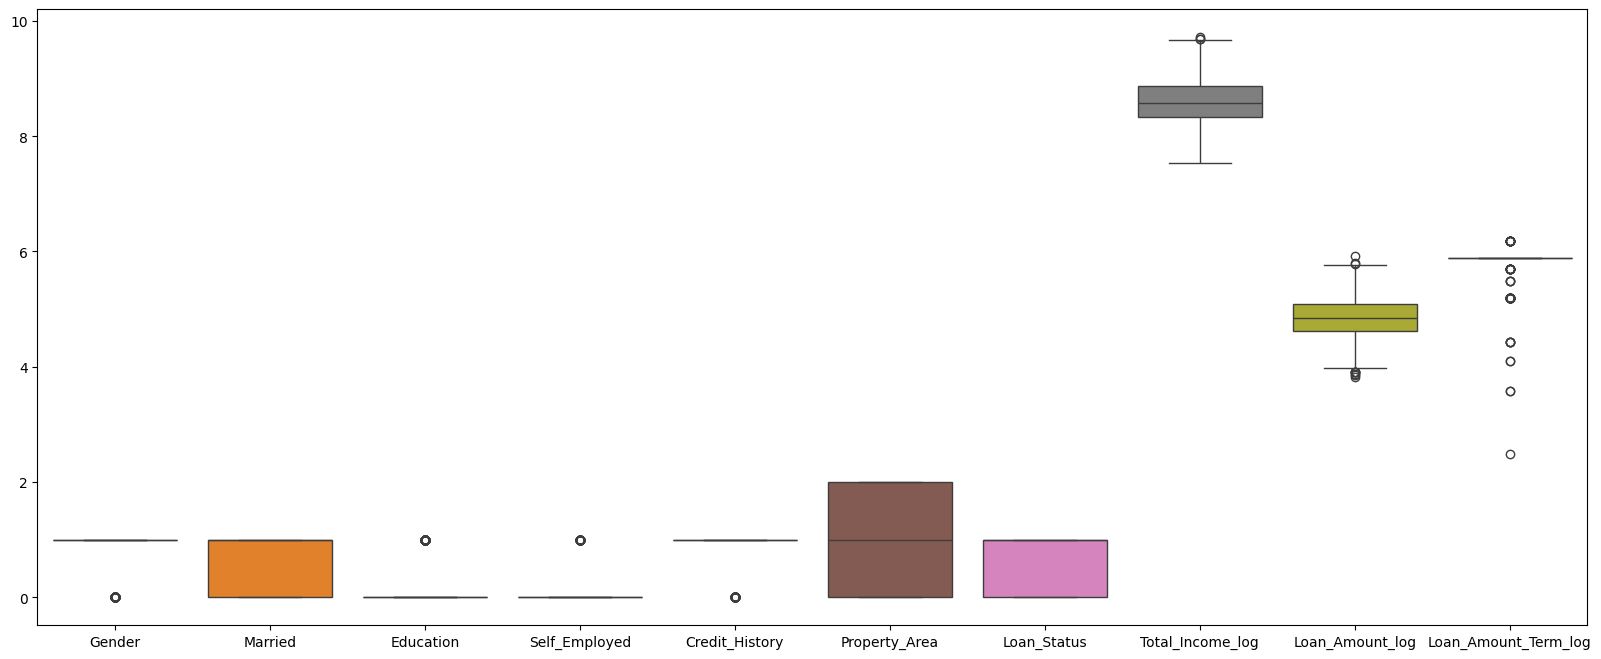

In [2057]:
##Checking the Outliers:
plt.figure(figsize=(20,8))
sns.boxplot(data = df)

In [2058]:
# Compute correlation matrix for checking multicolinearlity:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,Loan_Amount_log,Loan_Amount_Term_log
Gender,1.00,0.35,0.19,0.07,0.00,0.02,0.02,0.05,0.21,0.16,-0.06
Married,0.35,1.00,0.33,0.03,-0.02,0.04,0.05,0.11,0.16,0.20,-0.06
Dependents,0.19,0.33,1.00,0.07,0.05,-0.00,0.01,0.03,0.09,0.14,-0.05
Education,0.07,0.03,0.07,1.00,0.00,-0.04,-0.09,-0.06,-0.18,-0.14,-0.06
Self_Employed,0.00,-0.02,0.05,0.00,1.00,-0.06,-0.02,-0.07,0.15,0.08,-0.04
Credit_History,0.02,0.04,-0.00,-0.04,-0.06,1.00,-0.01,0.53,-0.00,-0.01,-0.00
Property_Area,0.02,0.05,0.01,-0.09,-0.02,-0.01,1.00,0.06,-0.02,-0.06,-0.08
Loan_Status,0.05,0.11,0.03,-0.06,-0.07,0.53,0.06,1.00,0.01,-0.03,0.01
Total_Income_log,0.21,0.16,0.09,-0.18,0.15,-0.00,-0.02,0.01,1.00,0.68,-0.06
Loan_Amount_log,0.16,0.20,0.14,-0.14,0.08,-0.01,-0.06,-0.03,0.68,1.00,0.04


In [2059]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,Loan_Amount_log,Loan_Amount_Term_log
263,0,0,0,0,0,1.0,0,1,8.881836,4.787492,5.886104
250,1,1,0,1,0,0.0,1,0,8.622994,5.303305,5.886104
163,1,1,2,0,0,1.0,0,1,8.633019,5.062595,5.886104
203,1,1,1,1,0,1.0,2,1,8.430109,4.905275,5.886104
8,1,1,2,0,0,1.0,2,1,8.618305,5.123964,5.886104


In [2060]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis = 1).values
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Model Building and Evaluation:


In [2061]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score


In [2062]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': svm.SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=1, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Evaluation metrics function
def evaluate_model(y_true, y_pred, return_results=False):
    precision = precision_score(y_true, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_true, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=1)
    try:
        loss_value = log_loss(y_true, y_pred)
    except ValueError:
        loss_value = None  # log_loss may fail if predictions are not probabilities
    accuracy = accuracy_score(y_true, y_pred)

    if return_results:
        return precision, recall, f1, loss_value, accuracy
    else:
        print(f'  Precision: {precision:.3f}')
        print(f'  Recall: {recall:.3f}')
        print(f'  F1 Score: {f1:.3f}')
        print(f'  Log Loss: {loss_value if loss_value is not None else "N/A":.3f}')
        print(f'  Accuracy: {accuracy:.3f}')

# Training and evaluation function
def train_and_evaluate(models, X, y):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X, y)
        y_pred = model.predict(X)
        evaluate_model(y, y_pred)
        print('-' * 30)

# Train and evaluate the models
train_and_evaluate(models, X_train, y_train)

Logistic Regression:
  Precision: 0.801
  Recall: 0.984
  F1 Score: 0.883
  Log Loss: 6.600
  Accuracy: 0.817
------------------------------
K-Nearest Neighbors:
  Precision: 0.799
  Recall: 0.972
  F1 Score: 0.877
  Log Loss: 6.904
  Accuracy: 0.808
------------------------------
Support Vector Classifier:
  Precision: 0.704
  Recall: 1.000
  F1 Score: 0.826
  Log Loss: 10.661
  Accuracy: 0.704
------------------------------
Decision Tree:
  Precision: 0.801
  Recall: 0.984
  F1 Score: 0.883
  Log Loss: 6.600
  Accuracy: 0.817
------------------------------
Naive Bayes:
  Precision: 0.807
  Recall: 0.972
  F1 Score: 0.882
  Log Loss: 6.600
  Accuracy: 0.817
------------------------------


Implementation Of SMOTE for better Result:

In [2063]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the dataset into training and test sets.
X = df.drop('Loan_Status', axis=1).values
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the original distribution in the training set
print("Original distribution in training set:", Counter(y_train))

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new distribution in the resampled training set
print("Resampled distribution in training set:", Counter(y_train_resampled))



# Calculate percentages for resampled training set
resampled_approved_percentage = (Counter(y_train_resampled)[1] / len(y_train_resampled)) * 100
resampled_not_approved_percentage = (Counter(y_train_resampled)[0] / len(y_train_resampled)) * 100

print('\nThe percentage of loan approved after SMOTE: %.2f%%' % resampled_approved_percentage)
print('The percentage of loan not approved after SMOTE: %.2f%%' % resampled_not_approved_percentage)

# Check the original test set distribution (unchanged)
print("\nOriginal distribution in test set:", Counter(y_test))

Original distribution in training set: Counter({1: 250, 0: 105})
Resampled distribution in training set: Counter({1: 250, 0: 250})

The percentage of loan approved after SMOTE: 50.00%
The percentage of loan not approved after SMOTE: 50.00%

Original distribution in test set: Counter({1: 108, 0: 45})


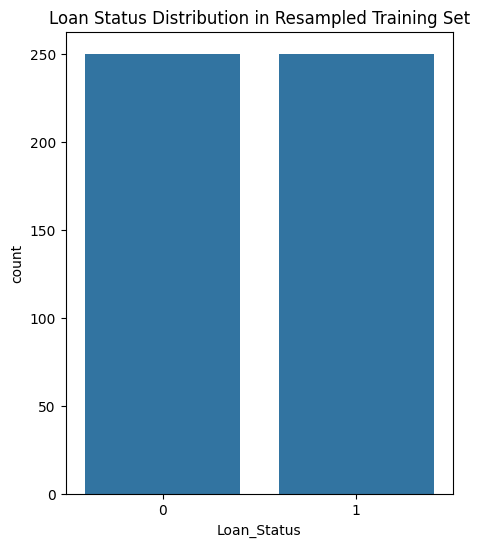

In [2064]:
# Visualize resampled training set distribution
resampled_df = pd.DataFrame(X_train_resampled, columns=df.drop('Loan_Status', axis=1).columns)
resampled_df['Loan_Status'] = y_train_resampled

plt.figure(figsize=(5, 6))
sns.countplot(x='Loan_Status', data=resampled_df)
plt.title('Loan Status Distribution in Resampled Training Set')
plt.show()

In [2065]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': svm.SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=1, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Evaluation metrics function
def evaluate_model(y_true, y_pred, return_results=False):
    precision = precision_score(y_true, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_true, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=1)
    try:
        loss_value = log_loss(y_true, y_pred)
    except ValueError:
        loss_value = None  # log_loss may fail if predictions are not probabilities
    accuracy = accuracy_score(y_true, y_pred)

    if return_results:
        return precision, recall, f1, loss_value, accuracy
    else:
        print(f'  Precision: {precision:.3f}')
        print(f'  Recall: {recall:.3f}')
        print(f'  F1 Score: {f1:.3f}')
        print(f'  Log Loss: {loss_value if loss_value is not None else "N/A":.3f}')
        print(f'  Accuracy: {accuracy:.3f}')

# Training and evaluation function
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)  # Evaluate on test data
        evaluate_model(y_test, y_pred)
        print('-' * 30)

# Train and evaluate the models
train_and_evaluate(models, X_train_resampled, y_train_resampled, X_test, y_test)


Logistic Regression:
  Precision: 0.788
  Recall: 0.963
  F1 Score: 0.867
  Log Loss: 7.539
  Accuracy: 0.791
------------------------------
K-Nearest Neighbors:
  Precision: 0.796
  Recall: 0.759
  F1 Score: 0.777
  Log Loss: 11.072
  Accuracy: 0.693
------------------------------
Support Vector Classifier:
  Precision: 0.791
  Recall: 0.981
  F1 Score: 0.876
  Log Loss: 7.067
  Accuracy: 0.804
------------------------------
Decision Tree:
  Precision: 0.791
  Recall: 0.981
  F1 Score: 0.876
  Log Loss: 7.067
  Accuracy: 0.804
------------------------------
Naive Bayes:
  Precision: 0.788
  Recall: 0.861
  F1 Score: 0.823
  Log Loss: 9.423
  Accuracy: 0.739
------------------------------


Original distribution in training set: Counter({1: 250, 0: 105})
Resampled distribution in training set: Counter({1: 250, 0: 250})


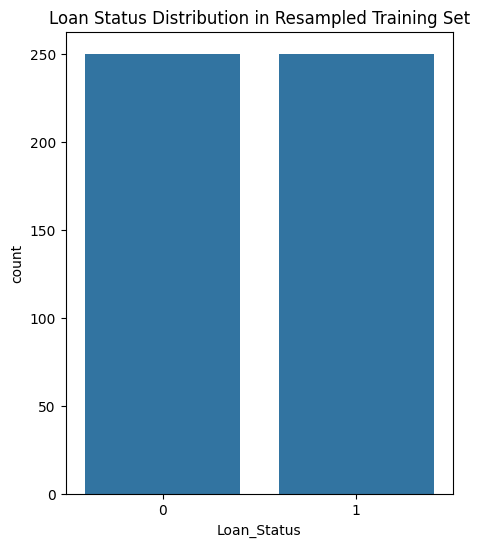


The percentage of loan approved after SMOTE: 50.00%
The percentage of loan not approved after SMOTE: 50.00%


In [2066]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Loan_Status' is the target column

# Split the dataset into training and test sets
X = df.drop('Loan_Status', axis=1).values
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Display the original distribution in the training set
print("Original distribution in training set:", Counter(y_train))

# Apply SMOTE to balance the training set (oversample minority class)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will match minority class to majority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new distribution in the resampled training set
print("Resampled distribution in training set:", Counter(y_train_resampled))

# Visualize resampled training set distribution
resampled_df = pd.DataFrame(X_train_resampled, columns=df.drop('Loan_Status', axis=1).columns)
resampled_df['Loan_Status'] = y_train_resampled

# Plotting the distribution
plt.figure(figsize=(5, 6))
sns.countplot(x='Loan_Status', data=resampled_df)
plt.title('Loan Status Distribution in Resampled Training Set')
plt.show()

# Calculate percentages for resampled training set
resampled_approved_percentage = (Counter(y_train_resampled)[1] / len(y_train_resampled)) * 100
resampled_not_approved_percentage = (Counter(y_train_resampled)[0] / len(y_train_resampled)) * 100

print('\nThe percentage of loan approved after SMOTE: %.2f%%' % resampled_approved_percentage)
print('The percentage of loan not approved after SMOTE: %.2f%%' % resampled_not_approved_percentage)


In [2067]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = df.drop('Loan_Status', axis=1).values
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply SMOTE (oversample minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler (under-sample majority class)
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_smote, y_train_smote)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after SMOTE and under-sampling: {accuracy:.3f}")


Accuracy after SMOTE and under-sampling: 0.791


Conclusion: Logistic Regression and Decision Tree classifiers provided the best accuracy (approximately 81.3%) without using SMOTE. After using SMOTE, Decision Tree and SVM classifiers achieved an accuracy of 80.23%. SMOTE did not significantly improve accuracy in this case, which might be due to the dataset size.
Also,  Credit History proved to be the most important feature for loan approval predictions, with a strong correlation to the target variable.
From the results, the Decision Tree algorithm will be used for final predictions due to its simplicity and interpretability, coupled with its strong performance.

